In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

plt.style.use('default')
sns.set_context('talk')

### Calibration Curves

Values extracted from the individual repositories for each of the models.

In [8]:
sharma = [6.45661157e-05,1.38817149e-03,2.90547521e-03,4.81017562e-03
,6.65030992e-03,1.03628616e-02,1.53990186e-02,2.12745351e-02
,2.91516012e-02,3.91593492e-02,5.24599690e-02,6.65353822e-02
,8.44524793e-02,1.07534866e-01,1.35072314e-01,1.76491477e-01
,2.29790806e-01,2.98973399e-01,3.88429752e-01,5.19047004e-01
,7.74761105e-01]

simple = [2.25022502e-04,2.51275128e-03,5.52555256e-03,9.90099010e-03
,1.49514951e-02,2.12896290e-02,3.06155616e-02,4.30918092e-02
,5.75807581e-02,7.56325633e-02,9.59595960e-02,1.20324532e-01
,1.54915492e-01,2.00682568e-01,2.57613261e-01,3.33533353e-01
,4.49419942e-01,5.62393739e-01,6.87918792e-01,7.97442244e-01
,9.49844984e-01]

quantiles_wehr = np.load('wehrbein_quantile_freqs.npy')
wehr = np.median(quantiles_wehr, axis=1)

quantiles_cgnf = np.load('quantile_freqs.npy')
cgnf = np.median(quantiles_cgnf, axis=1)

In [9]:
q = np.arange(0, 1.05, 0.05)

simple_ECE = np.abs(simple - q).mean()
sharma_ECE = np.abs(sharma - q).mean()
wehr_ECE = np.abs(wehr - q).mean()
cgnf_ECE = np.abs(cgnf - q).mean()

In [10]:
colors = {
 'cGNF': '#1E88E5', 'wehr': '#EDAC32', 'sharma': '#D81B60', 'simple': '#004D40', 'simple light': '#00997F'
}

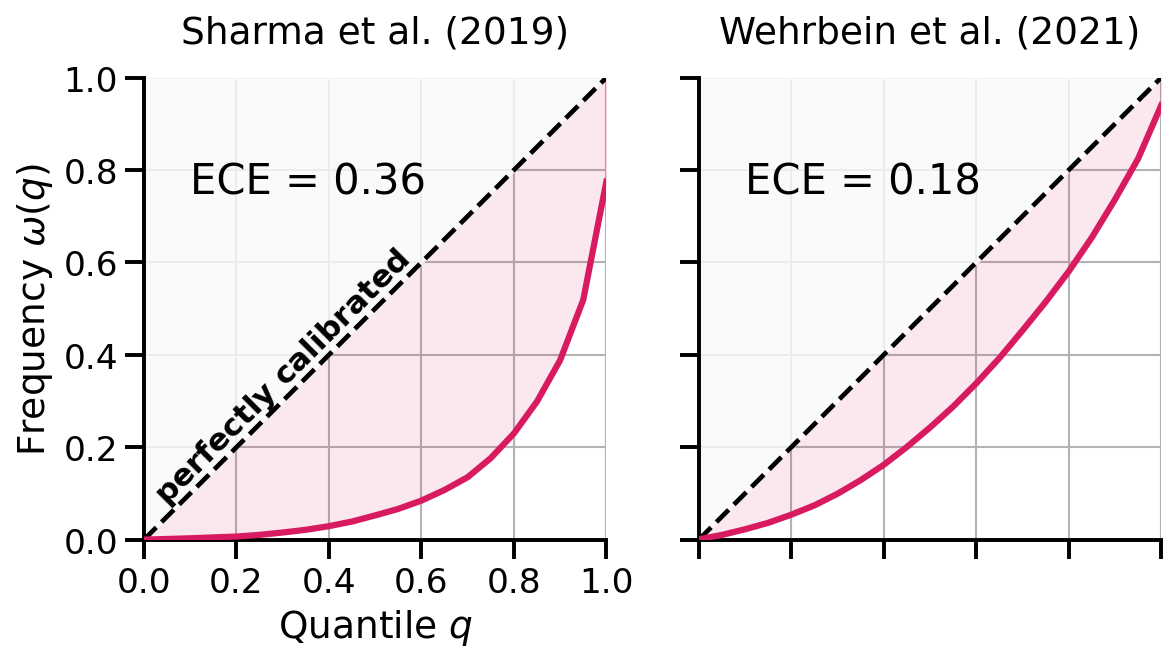

In [11]:
plt.figure(figsize=(8.75, 4), dpi=150)

plt.subplot(1, 2, 1)
plt.plot(np.arange(0, 1.05, 0.05), sharma, zorder=10, lw=3, c=colors['sharma'], label='Sharma et al.')

plt.fill_between(np.arange(0, 1.05, 0.05), np.arange(0, 1.05, 0.05), sharma, color=colors['sharma'], alpha=0.1)

plt.plot([0, 1], [0, 1], ls='--', c='k', zorder=2)
plt.xlim(-0, 1)
plt.ylim(-0, 1)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
sns.despine(trim=True)
plt.gca().set_axisbelow(True)

plt.text(.01, .08, '$\\mathbf{perfectly}$ $\\mathbf{calibrated}$', rotation=45, c='k', fontsize=15, zorder=10)

plt.text(.1, .75, f'ECE = {sharma_ECE:.2f}', rotation=0, c='k', fontsize=20, zorder=10)

plt.title('Sharma et al. (2019)', y=1.05)
plt.xlabel('Quantile $q$')
plt.ylabel('Frequency $\omega(q)$')

trig = plt.Polygon([[0, 0], [0, 1], [1, 1]], color='silver', zorder=1, alpha=0.25)
plt.gca().add_patch(trig)

trig = plt.Polygon([[0, 0], [0, 1], [1, 1]], color='white', zorder=1, alpha=0.75)
plt.gca().add_patch(trig)
plt.grid(ls="-", c=".7", lw=1., zorder=-10)

plt.subplot(1, 2, 2)
plt.plot(np.arange(0, 1.05, 0.05), wehr, zorder=10, lw=3, c=colors['sharma'], label='Wehrbein et al.')

plt.fill_between(np.arange(0, 1.05, 0.05), np.arange(0, 1.05, 0.05), wehr, color=colors['sharma'], alpha=0.1)

plt.plot([0, 1], [0, 1], ls='--', c='k', zorder=2)
plt.xlim(-0, 1)
plt.ylim(-0, 1)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
sns.despine(trim=True)
plt.gca().set_axisbelow(True)

plt.text(.1, .75, f'ECE = {wehr_ECE:.2f}', rotation=0, c='k', fontsize=20, zorder=10)

plt.title('Wehrbein et al. (2021)', y=1.05)

trig = plt.Polygon([[0, 0], [0, 1], [1, 1]], color='silver', zorder=1, alpha=0.25)
plt.gca().add_patch(trig)

trig = plt.Polygon([[0, 0], [0, 1], [1, 1]], color='white', zorder=1, alpha=0.75)
plt.gca().add_patch(trig)
plt.grid(ls="-", c=".7", lw=1., zorder=-10)

plt.savefig('calibration.pdf', bbox_inches='tight')

### Gaussian Model Scores
Scores imported from model results. This is only plotting

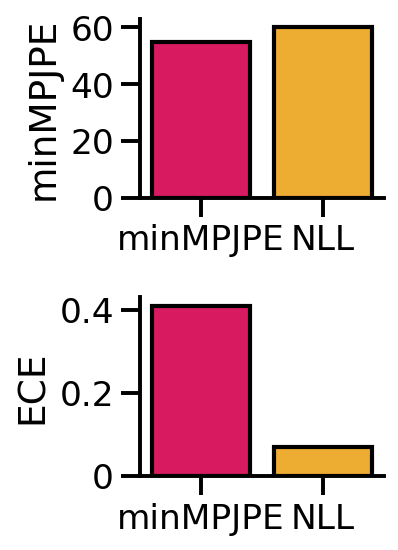

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 2

sns.set_context('talk')
plt.figure(figsize=(3, 4), dpi=150)
plt.subplot(2, 1, 1)
plt.bar([0, 1 ], [54.7, 60.1], color=[colors['sharma'], colors['wehr']], lw=2, edgecolor='k')
plt.xticks([0, 1], ['minMPJPE', 'NLL'])
plt.yticks([0, 20, 40, 60], [0, 20, 40, 60])
plt.xlim(-.5, 1.5)
plt.ylabel('minMPJPE')

plt.subplot(2, 1, 2)
plt.bar([0, 1], [0.41, 0.07], color=[colors['sharma'], colors['wehr']], lw=2, edgecolor='k')
plt.xticks([0, 1], ['minMPJPE', 'NLL'])
plt.yticks([0, 0.2, 0.4], [0, 0.2, 0.4])
sns.despine()
plt.ylabel('ECE')

plt.xlim(-.5, 1.5)

plt.tight_layout()
plt.savefig('gaussian_scores.pdf')